In [26]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Collecting and Scraping Data

In [3]:
credentials = json.load(open('authorization.json'))
client_id = credentials['client_id']
client_secret = credentials['client_secret']

playlist_index = 0

playlists = json.load(open('playlists_like_dislike.json'))
playlist_uri = playlists[playlist_index]['uri']
like = playlists[playlist_index]['like']

In [4]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
uri = playlist_uri    # the URI is split by ':' to get the username and playlist ID
username = uri.split(':')[2]
playlist_id = uri.split(':')[4]

In [6]:
results = sp.user_playlist(username, playlist_id, 'tracks')

In [171]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []
playlist_tracks_popularity = []

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    playlist_tracks_popularity.append(track['track']['popularity'])
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

In [172]:
features = sp.audio_features(playlist_tracks_id)

In [173]:
df = pd.DataFrame(data=features, columns=features[0].keys())

In [178]:
df['title'] = playlist_tracks_titles
df['first_artist'] = playlist_tracks_first_artists
df['all_artists'] = playlist_tracks_artists 
df['global_popularity'] = playlist_tracks_popularity
#features_df = features_df.set_index('id')
df = df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature', 'global_popularity']]

In [242]:
df = pd.read_csv('top_50_south_korea.csv')
df['kr_streams'] = df['kr_streams'].apply(lambda x: int(x.replace(',', '')))
display(df)

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,global_popularity,kr_streams
0,65FftemJ1DbbZ45DUfHJXE,OMG,NewJeans,['NewJeans'],0.804,0.771,9,-4.067,0,0.35700,0.000003,0.1080,0.739,126.956,212253,4,92,33546
1,3r8RuvgbX9s7ammBn07D3W,Ditto,NewJeans,['NewJeans'],0.814,0.641,6,-5.957,0,0.02700,0.000000,0.0993,0.183,133.854,185507,4,90,29128
2,59hBR0BCtJsfIbV9VzCVAp,Set Me Free Pt.2,Jimin,['Jimin'],0.585,0.815,0,-4.165,0,0.11500,0.000000,0.1240,0.564,132.090,200930,4,85,27993
3,61AZsmFB3VoJdmraMk5ZSn,VIBE (feat. Jimin of BTS),TAEYANG,"['TAEYANG', 'Jimin']",0.780,0.683,0,-5.319,1,0.08010,0.000000,0.2200,0.608,100.049,175776,4,83,23056
4,0a4MMyCrzT0En247IhqZbD,Hype Boy,NewJeans,['NewJeans'],0.593,0.935,4,-3.430,0,0.26800,0.000000,0.2860,0.783,99.976,179027,4,87,22950
5,5Odq8ohlgIbQKMZivbWkEo,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,"['Charlie Puth', 'Jung Kook', 'BTS']",0.881,0.592,2,-4.898,1,0.61900,0.000013,0.0901,0.719,101.058,154487,4,80,20460
6,3gmn76fCtpDazGMnN0QMHX,NIGHT DANCER,imase,['imase'],0.924,0.563,7,-7.899,0,0.08790,0.000000,0.1030,0.872,117.060,210600,4,68,19522
7,2RUcwyW74Sv4VracHFrKdh,Promise,Jimin,['Jimin'],0.692,0.534,2,-7.155,1,0.83000,0.000006,0.2380,0.739,88.964,151011,4,81,18564
8,2UrBX2cG7ZSnN2SbgspmtK,Grrr - Spotify Singles,Blase,"['Blase', 'BlackNut', 'Jimmy Paige', 'Dok2', '...",0.802,0.951,7,-2.798,1,0.21300,0.000003,0.2010,0.499,147.020,236867,4,48,16017
9,5wxYxygyHpbgv0EXZuqb9V,on the street (with J. Cole),j-hope,"['j-hope', 'J. Cole']",0.681,0.821,11,-5.120,0,0.53200,0.001110,0.0921,0.813,94.074,214701,4,88,15986


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50 non-null     object 
 1   title              50 non-null     object 
 2   first_artist       50 non-null     object 
 3   all_artists        50 non-null     object 
 4   danceability       50 non-null     float64
 5   energy             50 non-null     float64
 6   key                50 non-null     int64  
 7   loudness           50 non-null     float64
 8   mode               50 non-null     int64  
 9   acousticness       50 non-null     float64
 10  instrumentalness   50 non-null     float64
 11  liveness           50 non-null     float64
 12  valence            50 non-null     float64
 13  tempo              50 non-null     float64
 14  duration_ms        50 non-null     int64  
 15  time_signature     50 non-null     int64  
 16  global_popularity  50 non-nu

In [246]:
def tempo_identifier(tempo):
    if (tempo < 100):
        return 'slow'
    elif (tempo >= 100 and tempo < 150):
        return 'medium'
    elif (tempo >= 150):
        return 'fast'
    else:
        return 'na'
    
def key_identifier(key):
    if (key == 0):
        return 'C'
    elif (key == 1):
        return 'C#/Db'
    elif (key == 2):
        return 'D'
    elif (key == 3):
        return 'D#/Eb'
    elif (key == 4):
        return 'E'
    elif (key == 5):
        return 'F'
    elif (key == 6):
        return 'F#/Gb'
    elif (key == 7):
        return 'G'
    elif (key == 8):
        return 'G#/Ab'
    elif (key == 9):
        return 'A'
    elif (key == 10):
        return 'A#/Bb'
    elif (key == 11):
        return 'B'
    else:
        return 'na'
    
def duration_identifier(duration):
    if (duration < 110000): # less than 1 min 50 sec
        return 'short'
    elif (duration >= 110000 and duration < 180000): # between 1 min 50 sec and 3 min
        return 'medium'
    elif (duration > 180000): # more than 3 min
        return 'long'
    
def energy_identifier(energy):
    if (energy < 0.5):
        return 'low'
    elif (energy >= 0.5 and energy < 0.75):
        return 'medium'
    elif (energy >= 0.75):
        return 'high'
    else:
        return 'na'

In [247]:
df['tempo_identify'] = df['tempo'].apply(tempo_identifier)

In [248]:
df.tempo_identify.value_counts()

medium    31
slow      13
fast       6
Name: tempo_identify, dtype: int64

In [249]:
df['key_identify'] = df['key'].apply(key_identifier)

In [250]:
df.key_identify.value_counts()

C        9
G        6
C#/Db    6
D        5
B        5
A#/Bb    5
G#/Ab    5
F#/Gb    3
A        2
F        2
E        1
D#/Eb    1
Name: key_identify, dtype: int64

In [251]:
df['duration_identify'] = df['duration_ms'].apply(duration_identifier)

In [252]:
df.duration_identify.value_counts()

long      39
medium    11
Name: duration_identify, dtype: int64

In [253]:
df['title_length'] = df['title'].apply(lambda x: len(x))
df['title_length']

0      3
1      5
2     16
3     25
4      8
5     39
6     12
7      7
8     22
9     28
10     3
11     9
12    10
13     8
14     8
15     9
16    11
17    71
18    21
19    14
20     6
21    29
22    29
23    10
24    40
25     7
26    13
27     9
28    19
29     9
30     9
31    10
32     9
33    17
34     9
35     6
36     6
37    20
38    12
39    10
40     7
41    30
42    31
43    18
44    15
45     5
46     4
47     9
48     9
49     5
Name: title_length, dtype: int64

In [254]:
df['energy_identify'] = df['energy'].apply(energy_identifier)

In [255]:
df.energy_identify.value_counts()

high      22
medium    21
low        7
Name: energy_identify, dtype: int64

In [256]:
df.describe()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,global_popularity,kr_streams,title_length
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.649100,0.701560,5.120000,-4.787760,0.600000,0.272442,0.002958,0.188354,0.58358,118.22798,206267.740000,3.920000,71.280000,13404.420000,14.820000
std,0.149569,0.165986,3.987941,1.615329,0.494872,0.256595,0.020355,0.118543,0.20364,27.60954,33328.129526,0.274048,16.903133,5741.262867,12.265249
min,0.279000,0.394000,0.000000,-8.254000,0.000000,0.002070,0.000000,0.032200,0.13700,67.03300,131013.000000,3.000000,0.000000,8202.000000,3.000000
25%,0.575500,0.570250,1.000000,-5.900750,0.000000,0.060500,0.000000,0.099000,0.42450,99.98550,181276.750000,4.000000,59.250000,9272.500000,8.000000
50%,0.647000,0.719000,6.000000,-4.751000,1.000000,0.185500,0.000000,0.147500,0.61900,116.02650,201648.000000,4.000000,76.000000,11403.000000,10.000000
75%,0.773500,0.842750,8.000000,-3.704000,1.000000,0.498000,0.000003,0.247250,0.73400,132.06050,233234.250000,4.000000,83.000000,14860.750000,18.750000
max,0.924000,0.964000,11.000000,-1.215000,1.000000,0.830000,0.144000,0.515000,0.92200,186.07300,300787.000000,4.000000,96.000000,33546.000000,71.000000


In [257]:
df.columns

Index(['id', 'title', 'first_artist', 'all_artists', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'global_popularity', 'kr_streams', 'tempo_identify', 'key_identify',
       'duration_identify', 'title_length', 'energy_identify'],
      dtype='object')

<AxesSubplot:>

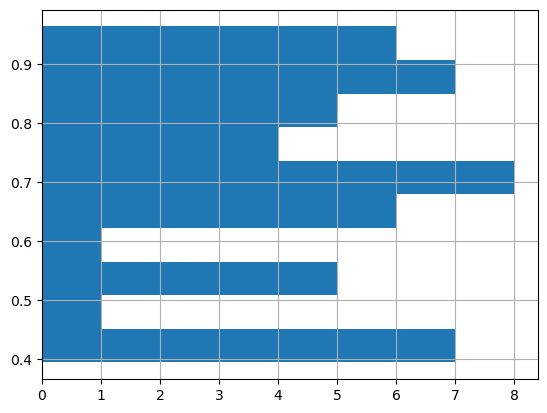

In [258]:
df.energy.hist(orientation='horizontal')

<AxesSubplot:>

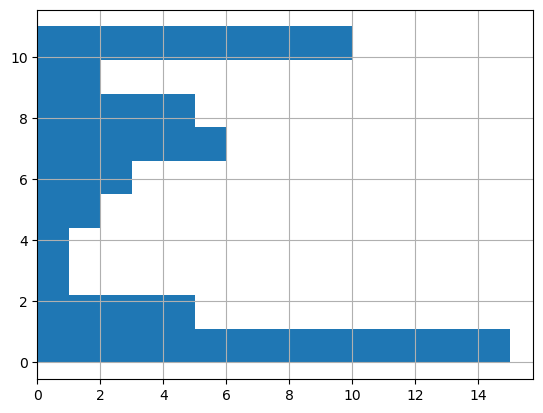

In [259]:
df.key.hist(orientation='horizontal')

<AxesSubplot:>

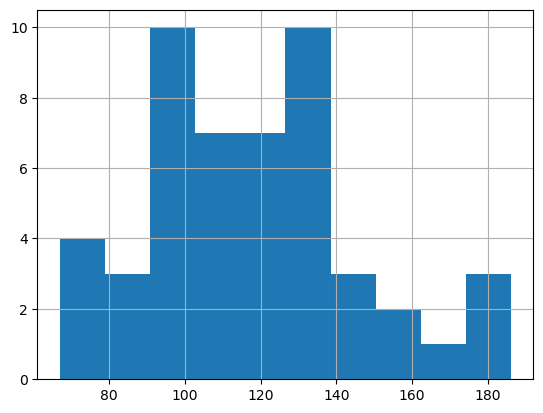

In [260]:
df.tempo.hist()

In [261]:
df['duration_min'] = df['duration_ms'].apply(lambda x: (x / 1000) / 60)

<AxesSubplot:>

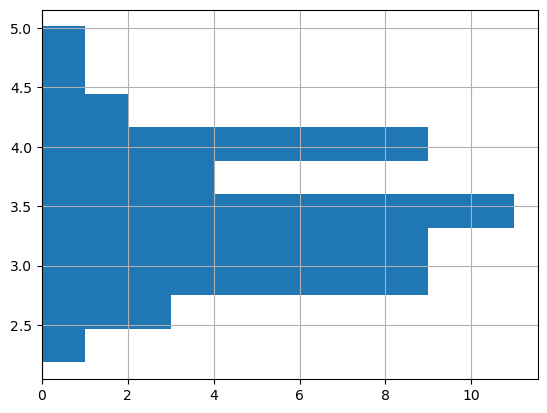

In [262]:
df.duration_min.hist(orientation='horizontal')

<AxesSubplot:>

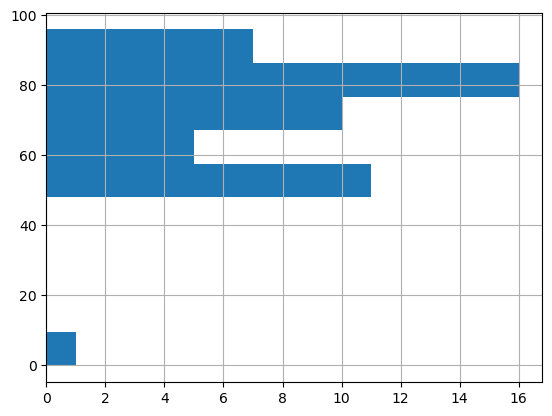

In [270]:
df.global_popularity.hist(orientation='horizontal')

<AxesSubplot:>

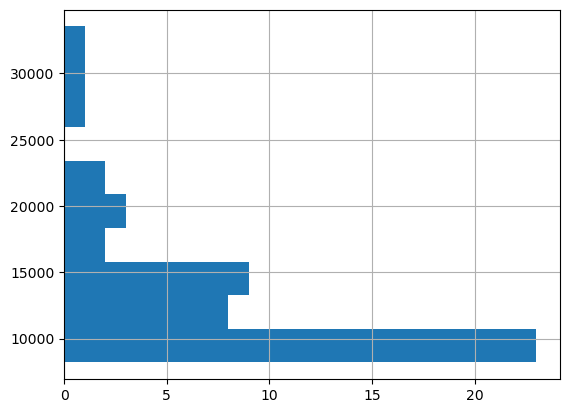

In [269]:
df.kr_streams.hist(orientation='horizontal')

<AxesSubplot:>

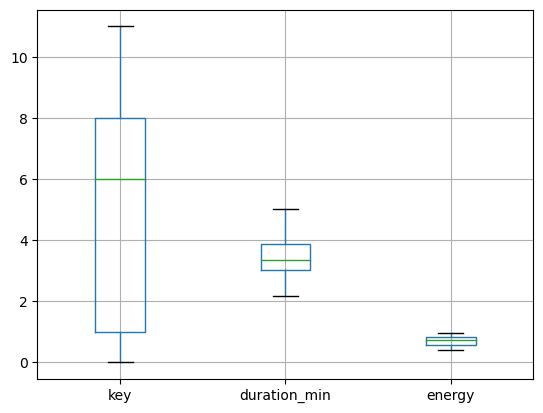

In [263]:
df.boxplot(column = ['key', 'duration_min', 'energy'])

<AxesSubplot:>

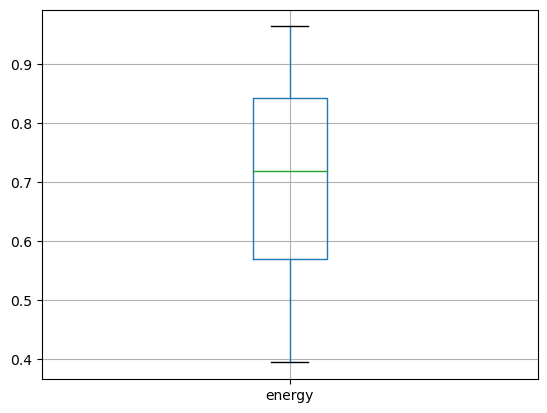

In [264]:
df.boxplot(column = ['energy'])

In [265]:
df[['key', 'tempo', 'duration_min', 'energy', 'global_popularity', 'kr_streams']].corr()

,key,tempo,duration_min,energy,global_popularity,kr_streams
key,1.000000,0.098059,0.078648,0.038466,-0.128573,-0.052398
tempo,0.098059,1.000000,-0.059925,-0.149663,0.181199,-0.058276
duration_min,0.078648,-0.059925,1.000000,-0.127132,-0.491811,-0.196485
energy,0.038466,-0.149663,-0.127132,1.000000,0.159656,0.076558
global_popularity,-0.128573,0.181199,-0.491811,0.159656,1.000000,0.358803
kr_streams,-0.052398,-0.058276,-0.196485,0.076558,0.358803,1.000000


<AxesSubplot:>

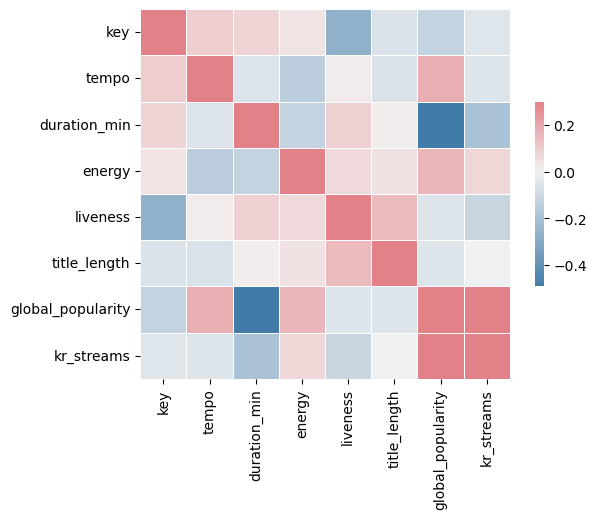

In [266]:
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df[['key', 'tempo', 'duration_min', 'energy', 'liveness', 'title_length', 'global_popularity', 'kr_streams']].corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [271]:
df.columns

Index(['id', 'title', 'first_artist', 'all_artists', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'global_popularity', 'kr_streams', 'tempo_identify', 'key_identify',
       'duration_identify', 'title_length', 'energy_identify', 'duration_min'],
      dtype='object')